In [2]:
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt

df = pd.read_csv("dataset\hcc_dataset.csv", na_values='?')
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives


In [3]:
print(df.shape[0])

df.info()


165
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null   

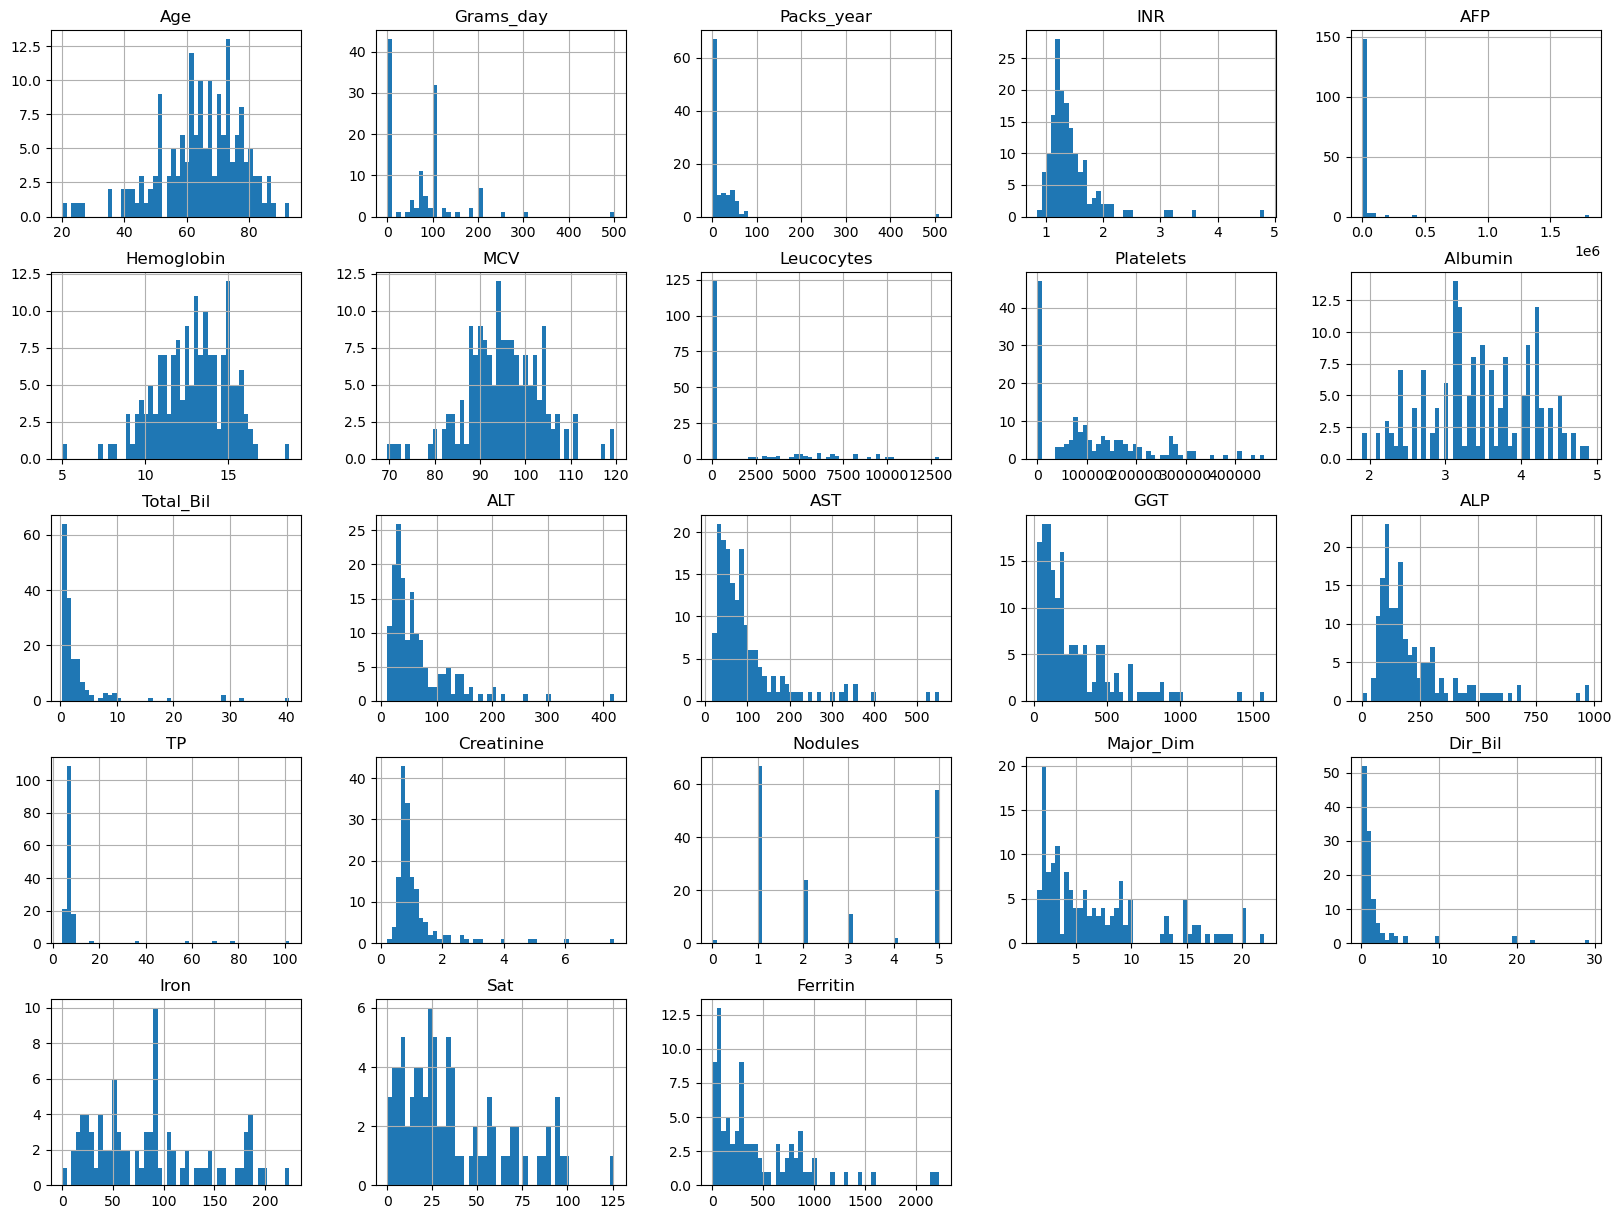

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Número de colunas com dados faltantes, se pode notar que há muitos dados faltantes em "Encephalopathy" e "Ascites", pelo que não me parecem boas features a se ter em consideração, 
li que features com mais de 80% de valores faltantes, em geral, não são boas features para avaliação, portanto se há por volta de 130 valores faltantes no nosso caso

In [5]:
df.isnull().sum()


Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
 Albumin            6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Major_Dim          20
Dir_Bil   

In [6]:
df.drop(columns=["Encephalopathy", "Ascites"])

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies
